# Data Science with D&D

Welcome to our ancient greek vessel! Aboard our ship, you will find 4 heroes (player characters), 11 special NPCs (characters from the story so far), and 100 sailors.

But who are those 100 souls that so bravely volunteered to join our epic journey through the vast and mysterious seas? Rather than always referring them to "random crew members", I wanted to make things more interesting, and actually created a complete passenger list (which coincidentally, my character, a scholar, also did). 

## Notes on the creation of the list
The passenger list was created by following these steps:

- Went to a website of ancient greek names, and (more or less) randomly selected 100 names
- Alphabetized the list of names and pasted it into a spreadsheet
- Automatically numbered the list from 1-100
- Assigned gender to each name (based on whether the names were intended for male or female people)
- Created a list of all possible character races in this world (Centaur, Dwarf, Elf, Gnome, Half-Elf, Half-Orc, Halfling, Human, Minotaur, Nymph, Orc, Satyr, Siren, Tiefling) and duplicated some races in the list, which are more likely the appear (e.g. human)
- Randomized the list of races about 4x and pasted it into the spreadsheet, thereby randomly assigning a race to each name
- Randomly generated a list of numbers between 18 and 65, with numbers between 20 and 30 to be most likely to appear
- Randomized this list of numbers about 4x and pasted each randomization into the spreadsheet, thereby randomly assigning a race to each name

This data was then stored in a MySQL database.


## Import the data

In [13]:
import mysql.connector as mysql
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

Get the data from SQL
(removed from repository for obvious reasons)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


In [ ]:
db_connection = mysql.connect(host='xxx', database='xxx', user='xxx', password='xxx')

df = pd.read_sql('SELECT * FROM xxx', con=db_connection)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


Write the SQL data to CSV (for the repository)

In [74]:
df.to_csv('ultros.csv', encoding='utf-8', index=False)

Read the CSV (for the repository)

In [77]:
df = pd.read_csv('ultros.csv', index_col=False)

---
## View the data

### Check the first items

In [79]:
df.head()

,Number,Name,Race,Gender,Age,Origin,Status,Notes
0,1,Aegeus,Human,m,22,NaN,alive,NaN
1,2,Alethea,Satyr,f,58,NaN,alive,NaN
2,3,Anaxagoras,Human,m,56,NaN,alive,NaN
3,4,Andie,Centaur,m,30,NaN,alive,<p>- main ballista crew <br />- manned the fro...
4,5,Atlas,Satyr,m,20,NaN,dead,<p>- manned the front ballista in the fight ag...


### Show names and races

In [81]:
df[['Name', 'Race']]

,Name,Race
0,Aegeus,Human
1,Alethea,Satyr
2,Anaxagoras,Human
3,Andie,Centaur
4,Atlas,Satyr
...,...,...
95,Xanthippe,Satyr
96,Xerxes,Dwarf
97,Zebedee,Human
98,Zopyros,Human


### List all centaurs

In [82]:
df.query("Race == 'Centaur'")

,Number,Name,Race,Gender,Age,Origin,Status,Notes
3,4,Andie,Centaur,m,30,NaN,alive,<p>- main ballista crew <br />- manned the fro...
11,12,Celandine,Centaur,f,33,NaN,alive,<p>- secondary ballista crew</p>
40,41,Inatha,Centaur,f,32,NaN,alive,NaN
48,49,Klotho,Centaur,m,38,NaN,alive,NaN
56,57,Ligeia,Centaur,f,25,NaN,alive,NaN
73,74,Nike,Centaur,m,28,NaN,alive,<p>- main ballista crew</p>
88,89,Stelios,Centaur,m,44,NaN,alive,NaN


### Show means, averages, etc for the numeric fields

In [83]:
df.describe()

,Number,Age
count,100.000000,100.000000
mean,50.500000,33.210000
std,29.011492,12.995955
min,1.000000,18.000000
25%,25.750000,23.750000
50%,50.500000,29.000000
75%,75.250000,39.250000
max,100.000000,64.000000


### Count male and female crew members

In [84]:
df.groupby("Gender").count()

,Number,Name,Race,Age,Origin,Status,Notes
Gender,,,,,,,
f,40,40,40,40,3,40,11
m,60,60,60,60,2,60,24


### Show numeric information about each of the different races
`Number` refers to the ID

In [85]:
dfRaces = df.groupby('Race')
dfRaces.describe()

Number                                                          Age  \
          count       mean        std   min    25%   50%    75%    max count   
Race                                                                           
Centaur     7.0  46.571429  30.837516   4.0  26.50  49.0  65.50   89.0   7.0   
Dwarf       8.0  57.250000  28.110750  20.0  37.75  55.5  78.25   97.0   8.0   
Elf         2.0  43.000000  38.183766  16.0  29.50  43.0  56.50   70.0   2.0   
Gnome       3.0  51.666667  28.919428  26.0  36.00  46.0  64.50   83.0   3.0   
Half-Elf    2.0  59.000000  35.355339  34.0  46.50  59.0  71.50   84.0   2.0   
Half-Orc    3.0  62.333333  38.940125  18.0  48.00  78.0  84.50   91.0   3.0   
Halfling    3.0  34.000000  24.515301   9.0  22.00  35.0  46.50   58.0   3.0   
Human      36.0  47.888889  29.934956   1.0  22.50  47.5  71.25  100.0  36.0   
Minotaur    7.0  45.714286  31.052183   7.0  23.00  50.0  61.00   95.0   7.0   
Nymph       7.0  58.142857  27.763457  24.0  33.50  65.0  79.00   93.0   7.0   
Orc         3.0  59.000000  28.827071  33.0  43.50  54.0  72.00   90.0   3.0   
Satyr       7.0  54.000000  38.948684   2.0  24.50  61.0  85.00   96.0   7.0   
Siren       8.0  51.500000  26.667262  14.0  34.75  52.0  70.00   87.0   8.0   
Tiefling    4.0  50.000000  30.876096  13.0  31.00  53.0  72.00   81.0   4.0   

                                                                
               mean        std   min    25%   50%    75%   max  
Race                                                            
Centaur   32.857143   6.388233  25.0  29.00  32.0  35.50  44.0  
Dwarf     34.875000  12.472112  22.0  25.25  33.5  40.50  59.0  
Elf       25.000000   5.656854  21.0  23.00  25.0  27.00  29.0  
Gnome     38.666667  19.218047  18.0  30.00  42.0  49.00  56.0  
Half-Elf  32.000000  12.727922  23.0  27.50  32.0  36.50  41.0  
Half-Orc  39.333333  22.030282  18.0  28.00  38.0  50.00  62.0  
Halfling  38.333333  22.278540  24.0  25.50  27.0  45.50  64.0  
Human     33.138889  13.273287  18.0  25.00  28.0  38.25  63.0  
Minotaur  29.142857  10.526610  18.0  24.50  26.0  30.00  51.0  
Nymph     26.000000   5.385165  18.0  22.00  27.0  31.00  31.0  
Orc       25.333333   7.571878  20.0  21.00  22.0  28.00  34.0  
Satyr     39.285714  16.650468  18.0  26.00  39.0  54.00  58.0  
Siren     30.875000  14.307216  19.0  20.50  25.5  36.00  59.0  
Tiefling  43.000000  12.675436  28.0  34.75  45.0  53.25  54.0

### Sadly, some crew members have heroically died...

In [125]:
df[df["Status"] == "dead"]

,Number,Name,Race,Gender,Age,Origin,Status,Notes
4,5,Atlas,Satyr,m,1,NaN,dead,<p>- manned the front ballista in the fight ag...
5,6,Atticus,Human,m,3,NaN,dead,<p>- manned the front ballista in the fight ag...
15,16,Cleitus,Elf,m,2,Aresia,dead,<p>- manned the back ballista in the fight aga...


In [86]:
dfAges = df.groupby('Status')
dfAges.describe()

Number                                                       Age  \
        count       mean        std  min   25%   50%   75%    max count   
Status                                                                    
alive    97.0  51.783505  28.490578  1.0  28.0  52.0  76.0  100.0  97.0   
dead      3.0   9.000000   6.082763  5.0   5.5   6.0  11.0   16.0   3.0   

                                                            
             mean        std   min   25%   50%   75%   max  
Status                                                      
alive   33.381443  13.119994  18.0  24.0  29.0  40.0  64.0  
dead    27.666667   7.094599  20.0  24.5  29.0  31.5  34.0

### Crew members younger than 20 years

In [87]:
df[df["Age"] < 20]

,Number,Name,Race,Gender,Age,Origin,Status,Notes
29,30,Gennadios,Human,m,19,NaN,alive,NaN
37,38,Hypatios,Nymph,m,18,NaN,alive,NaN
39,40,Iduma,Siren,f,19,NaN,alive,NaN
45,46,Karpos,Gnome,m,18,NaN,alive,NaN
75,76,Okeanos,Satyr,m,18,NaN,alive,NaN
77,78,Pallas,Half-Orc,m,18,NaN,alive,NaN
78,79,Pamphilos,Siren,m,19,NaN,alive,NaN
91,92,Timaeus,Human,m,18,NaN,alive,<p>- main ballista crew <br />- manned the bac...
94,95,Vasiliki,Minotaur,f,18,NaN,alive,NaN
97,98,Zebedee,Human,m,19,NaN,alive,NaN


In [24]:
df[(df["Race"] == "Human") & (df["Age"] > 60)]

,Number,Name,Race,Gender,Age,Origin,Status,Notes
27,28,Evgenia,Human,f,63,NaN,alive,NaN
54,55,Leptina,Human,f,61,NaN,alive,<p>- manned the back ballista in the fight aga...
70,71,Nephthys,Human,m,61,NaN,alive,NaN


## Plots

(work in progress)

<AxesSubplot:title={'center':'Age'}, xlabel='[Gender]'>

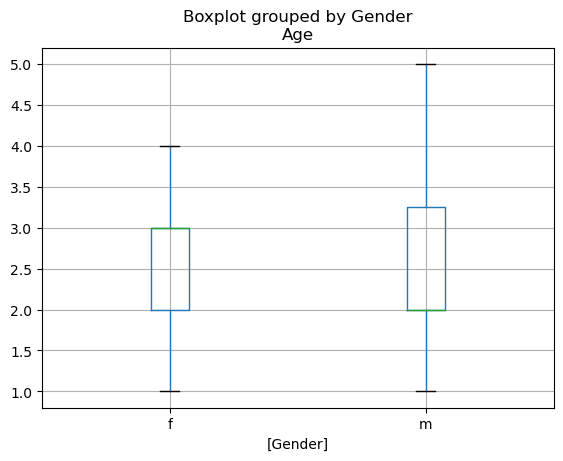

In [118]:
df.boxplot(by=['Gender'], sym ='', column=['Age'])

<AxesSubplot:title={'center':'Age'}, xlabel='[Race]'>

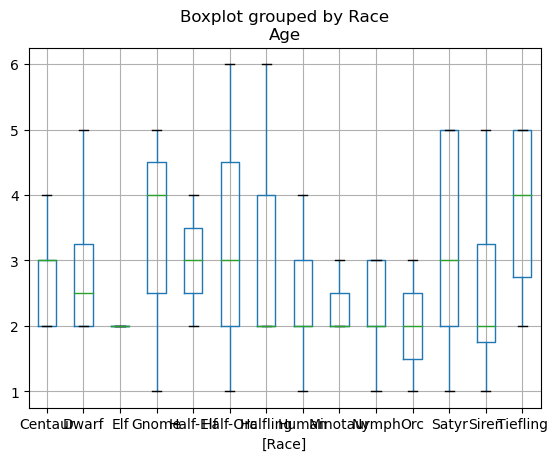

In [120]:
df.boxplot(by=['Race'], sym ='', column=['Age'])

<AxesSubplot:title={'center':'Age'}, xlabel='[Status]'>

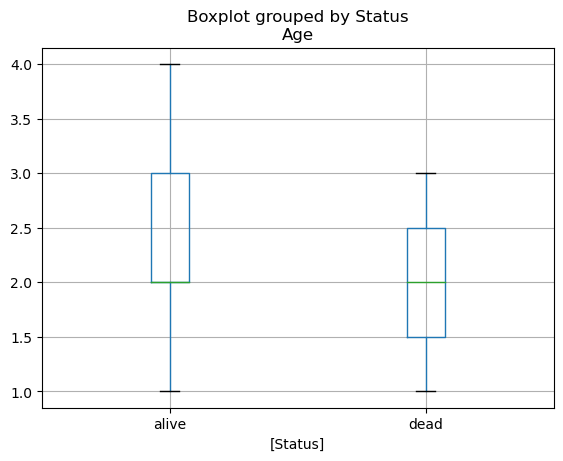

In [121]:
df.boxplot(by=['Status'], sym ='', column=['Age'])